In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

623

In [11]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [12]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=c1bde85b70694e931fc4b3224de00fc1


In [13]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [14]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [15]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | ribeira grande
Processing Record 2 of Set 1 | pevek
Processing Record 3 of Set 1 | gladstone
Processing Record 4 of Set 1 | cabo san lucas
Processing Record 5 of Set 1 | mar del plata
Processing Record 6 of Set 1 | hilo
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kapaa
Processing Record 9 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 10 of Set 1 | sur
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | kyren
Processing Record 13 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 14 of Set 1 | san patricio
Processing Record 15 of Set 1 | clyde river
Processing Record 16 of Set 1 | saint-pierre
Processing Record 17 of Set 1 | lorengau
Processing Record 18 of Set 1 | da nang
Processing Record 19 of Set 1 | abu samrah
Processing Record 20 of Set 1 | shingu
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | lavrentiya
Processing Record 23 of Set 1 | sambav

Processing Record 41 of Set 4 | rio grande
Processing Record 42 of Set 4 | dongsheng
Processing Record 43 of Set 4 | saint-georges
Processing Record 44 of Set 4 | missoula
Processing Record 45 of Set 4 | xinan
Processing Record 46 of Set 4 | millau
Processing Record 47 of Set 4 | noumea
Processing Record 48 of Set 4 | rudnogorsk
Processing Record 49 of Set 4 | nhulunbuy
Processing Record 50 of Set 4 | pindiga
Processing Record 1 of Set 5 | kruisfontein
Processing Record 2 of Set 5 | fez
Processing Record 3 of Set 5 | illoqqortoormiut
City not found. Skipping...
Processing Record 4 of Set 5 | khatanga
Processing Record 5 of Set 5 | atar
Processing Record 6 of Set 5 | walvis bay
Processing Record 7 of Set 5 | burica
City not found. Skipping...
Processing Record 8 of Set 5 | mareeba
Processing Record 9 of Set 5 | petrolina de goias
Processing Record 10 of Set 5 | vestmannaeyjar
Processing Record 11 of Set 5 | avera
Processing Record 12 of Set 5 | bitung
Processing Record 13 of Set 5 | sit

Processing Record 29 of Set 8 | nalut
Processing Record 30 of Set 8 | baoshan
Processing Record 31 of Set 8 | slave lake
Processing Record 32 of Set 8 | jiblah
Processing Record 33 of Set 8 | gus-zheleznyy
Processing Record 34 of Set 8 | vanavara
Processing Record 35 of Set 8 | brigantine
Processing Record 36 of Set 8 | baturaden
Processing Record 37 of Set 8 | saint-philippe
Processing Record 38 of Set 8 | gweta
Processing Record 39 of Set 8 | meulaboh
Processing Record 40 of Set 8 | tiarei
Processing Record 41 of Set 8 | akureyri
Processing Record 42 of Set 8 | alice springs
Processing Record 43 of Set 8 | sanmenxia
Processing Record 44 of Set 8 | saint-augustin
Processing Record 45 of Set 8 | kloulklubed
Processing Record 46 of Set 8 | portland
Processing Record 47 of Set 8 | azare
Processing Record 48 of Set 8 | cabra
Processing Record 49 of Set 8 | glenwood springs
Processing Record 50 of Set 8 | shelburne
Processing Record 1 of Set 9 | matagami
Processing Record 2 of Set 9 | moca

Processing Record 14 of Set 12 | tunceli
Processing Record 15 of Set 12 | aktas
Processing Record 16 of Set 12 | thurso
Processing Record 17 of Set 12 | jiddah
City not found. Skipping...
Processing Record 18 of Set 12 | egvekinot
Processing Record 19 of Set 12 | araouane
Processing Record 20 of Set 12 | fayaoue
Processing Record 21 of Set 12 | roebourne
Processing Record 22 of Set 12 | ussel
Processing Record 23 of Set 12 | santa marta
Processing Record 24 of Set 12 | katherine
Processing Record 25 of Set 12 | inyonga
Processing Record 26 of Set 12 | tondano
Processing Record 27 of Set 12 | malwan
City not found. Skipping...
Processing Record 28 of Set 12 | korla
Processing Record 29 of Set 12 | pandan
Processing Record 30 of Set 12 | kayes
Processing Record 31 of Set 12 | codajas
Processing Record 32 of Set 12 | klaksvik
Processing Record 33 of Set 12 | muros
Processing Record 34 of Set 12 | pringsewu
Processing Record 35 of Set 12 | san nicolas
Processing Record 36 of Set 12 | bowen

In [16]:
len(city_data)

568

In [17]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Ribeira Grande,38.52,-28.70,75.20,88,75,28.86,PT,2020-08-17 14:33:17
1,Pevek,69.70,170.31,36.45,91,97,7.36,RU,2020-08-17 14:33:18
2,Gladstone,-23.85,151.25,57.20,71,0,3.36,AU,2020-08-17 14:33:18
3,Cabo San Lucas,22.89,-109.91,86.00,69,9,1.01,MX,2020-08-17 14:28:39
4,Mar Del Plata,-38.00,-57.56,53.01,43,0,13.87,AR,2020-08-17 14:30:42
5,Hilo,19.73,-155.09,75.20,83,90,3.36,US,2020-08-17 14:32:54
6,Rikitea,-23.12,-134.97,70.68,78,13,12.12,PF,2020-08-17 14:33:18
7,Kapaa,22.08,-159.32,75.20,83,90,5.82,US,2020-08-17 14:33:19
8,Sur,22.57,59.53,89.69,58,74,9.78,OM,2020-08-17 14:33:19
9,Punta Arenas,-53.15,-70.92,35.60,93,75,18.34,CL,2020-08-17 14:33:19


In [19]:
new_column_order = ['City', 'Country','Date',
                    'Lat','Lng', 'Max Temp','Humidity',
                    'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Ribeira Grande,PT,2020-08-17 14:33:17,38.52,-28.70,75.20,88,75,28.86
1,Pevek,RU,2020-08-17 14:33:18,69.70,170.31,36.45,91,97,7.36
2,Gladstone,AU,2020-08-17 14:33:18,-23.85,151.25,57.20,71,0,3.36
3,Cabo San Lucas,MX,2020-08-17 14:28:39,22.89,-109.91,86.00,69,9,1.01
4,Mar Del Plata,AR,2020-08-17 14:30:42,-38.00,-57.56,53.01,43,0,13.87
...,...,...,...,...,...,...,...,...,...
563,Dali,CN,2020-08-17 14:35:20,25.70,100.18,62.51,91,100,2.89
564,Linares,CL,2020-08-17 14:35:20,-35.85,-71.60,47.71,69,0,3.58
565,Barra Patuca,HN,2020-08-17 14:35:20,15.80,-84.28,83.14,78,83,3.74
566,Bahawalnagar,PK,2020-08-17 14:35:20,30.55,73.39,98.76,38,14,10.11


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [24]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [25]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1597676260.1949043

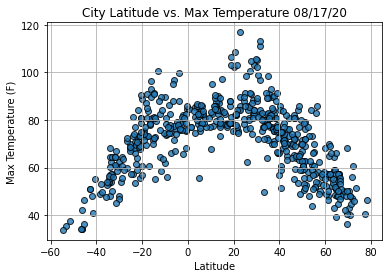

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

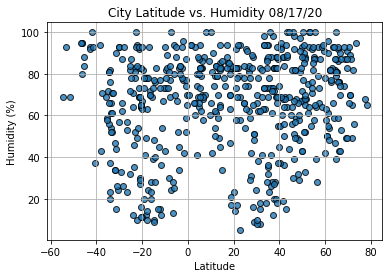

In [27]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

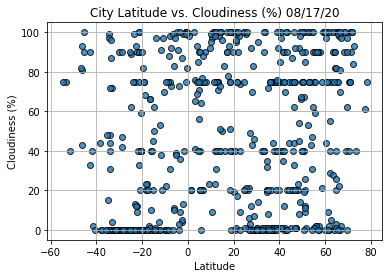

In [28]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

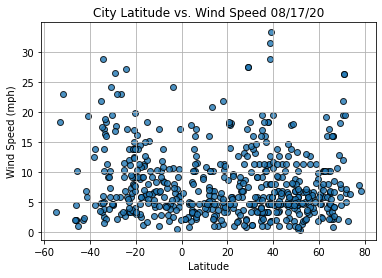

In [29]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()